In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
class Panel:
    def __init__(self,xa,ya,xb,yb):
        self.xa,self.ya = xa,ya
        self.xb,self.yb = xb,yb
        
        self.xc,self.yc = (xa+xb)/2, (ya+yb)/2
        self.length = numpy.sqrt((xb-xa)**2+(yb-ya)**2)
        if xb-xa <= 0.:
            self.beta = numpy.arccos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = numpy.pi + numpy.arccos(-(yb-ya)/self.length)
            
        self.n=[numpy.cos(self.beta),numpy.sin(self.beta)]
        self.t=[-numpy.sin(self.beta),numpy.cos(self.beta)]
        self.sigma = 1
        self.vt = 0
        self.cp = 0
        
        # location of the panel
        if self.beta <= numpy.pi:
            self.loc = 'upper'
        else:
            self.loc = 'lower'

# 1

In [3]:
R = 1.0                                                     # radius
theta = numpy.linspace(0, 2*numpy.pi, 100)                           # angles in radians
x_cylinder, y_cylinder = R*numpy.cos(theta), R*numpy.sin(theta)   # coordinates of the cylinder
N_panels = 10                    # number of panels desired

# defining the end-points of the panels
x_ends = R*numpy.cos(numpy.linspace(0, 2*numpy.pi, N_panels+1))
y_ends = R*numpy.sin(numpy.linspace(0, 2*numpy.pi, N_panels+1))

# defining the panels
panels = numpy.empty(N_panels, dtype=object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])

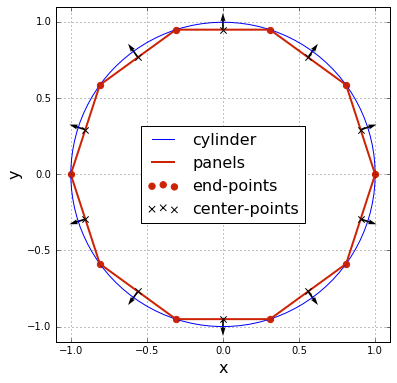

In [4]:
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_cylinder, y_cylinder, color='b', linestyle='-', linewidth=1)
pyplot.plot(x_ends, y_ends, color='#CD2305', linestyle='-', linewidth=2)
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels], color='#CD2305', s=40)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels], color='k', s=40, zorder=3, marker='x')
pyplot.legend(['cylinder', 'panels', 'end-points', 'center-points'], 
           loc='best', prop={'size':16})
pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [p.n[0] for p in panels], [p.n[1] for p in panels],
              scale=20, width=0.005)
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);

In [5]:
class FS:
    def __init__(self,u_inf,alpha):
        self.u_inf = u_inf
        self.alpha = numpy.radians(alpha)

In [6]:
u_inf = 1
alpha = 0.0
fs = FS(u_inf,alpha)

In [7]:
def panel_vel(p,x,y):
    x_p = numpy.sin(p.beta)*(x-p.xb) - numpy.cos(p.beta)*(y-p.yb)
    y_p = numpy.cos(p.beta)*(x-p.xb) + numpy.sin(p.beta)*(y-p.yb)
    u_p = p.sigma/(4*numpy.pi)*numpy.log((x_p**2+y_p**2)/((x_p-p.length)**2+y_p**2))
    v_p = p.sigma/(2*numpy.pi)*(numpy.arctan2(y_p,x_p-p.length)-numpy.arctan2(y_p,x_p))
    u = numpy.sin(p.beta)*u_p + numpy.cos(p.beta)*v_p
    v = -numpy.cos(p.beta)*u_p + numpy.sin(p.beta)*v_p
    return u,v

In [8]:
def build_matrix(panels):
    N=len(panels)
    A = numpy.empty((N,N),dtype=float)
    b = numpy.empty(len(panels),dtype=float)
    numpy.fill_diagonal(A,0.5)
    
    for i, p_i in enumerate(panels):
        for j,p_j in enumerate(panels):
            if i != j:
                A[i,j] = numpy.dot(panel_vel(p_j,p_i.xc,p_i.yc),p_i.n)
        b[i] = -numpy.dot(numpy.array([u_inf,0]),p_i.n)
    return A,b

In [9]:
A,b = build_matrix(panels)
print(A,b)
sigma = numpy.linalg.solve(A,b)
sigma

[[ 0.5         0.04428288  0.05029841  0.05101164  0.05121503  0.05126469
   0.05121503  0.05101164  0.05029841  0.04428288]
 [ 0.04428288  0.5         0.04428288  0.05029841  0.05101164  0.05121503
   0.05126469  0.05121503  0.05101164  0.05029841]
 [ 0.05029841  0.04428288  0.5         0.04428288  0.05029841  0.05101164
   0.05121503  0.05126469  0.05121503  0.05101164]
 [ 0.05101164  0.05029841  0.04428288  0.5         0.04428288  0.05029841
   0.05101164  0.05121503  0.05126469  0.05121503]
 [ 0.05121503  0.05101164  0.05029841  0.04428288  0.5         0.04428288
   0.05029841  0.05101164  0.05121503  0.05126469]
 [ 0.05126469  0.05121503  0.05101164  0.05029841  0.04428288  0.5
   0.04428288  0.05029841  0.05101164  0.05121503]
 [ 0.05121503  0.05126469  0.05121503  0.05101164  0.05029841  0.04428288
   0.5         0.04428288  0.05029841  0.05101164]
 [ 0.05101164  0.05121503  0.05126469  0.05121503  0.05101164  0.05029841
   0.04428288  0.5         0.04428288  0.05029841]
 [ 0.05

array([ -2.17594204e+00,  -1.34480614e+00,  -1.07242296e-15,
         1.34480614e+00,   2.17594204e+00,   2.17594204e+00,
         1.34480614e+00,   4.35659510e-17,  -1.34480614e+00,
        -2.17594204e+00])

In [21]:
for i, panel in enumerate(panels):
    panel.sigma = float(sigma[i])
    
print([p.sigma for p in panels])

[-2.1759420368495723, -1.344806136322712, -1.072422955875987e-15, 1.3448061363227115, 2.1759420368495723, 2.1759420368495728, 1.3448061363227124, 4.356595097003202e-17, -1.344806136322711, -2.175942036849572]


In [22]:
def build_A(panels):
    N=len(panels)
    AA = numpy.empty((N,N),dtype=float)
    bb = numpy.empty(len(panels),dtype=float)
    numpy.fill_diagonal(AA,0.0)
    
    for i, p_i in enumerate(panels):
        for j,p_j in enumerate(panels):
            if i != j:
                AA[i,j] = numpy.dot(panel_vel(p_j,p_i.xc,p_i.yc),p_i.t)
        bb[i] = numpy.dot(numpy.array([u_inf,0]),p_i.t)
    return AA,bb


AA,bb = build_A(panels)

# computes the tangential velocity at each panel center-point
vt = numpy.dot(AA, sigma) + bb
vt
for i, panel in enumerate(panels):
    panel.vt = vt[i]
AA,bb

(array([[  0.00000000e+00,   2.35647153e-01,   7.82346430e-17,
          -5.11788257e-02,  -3.69008489e-02,   2.08166817e-17,
           2.28059788e-02,   1.65797445e-18,  -9.81053486e-02,
          -3.81285103e-01],
        [ -3.81285103e-01,   0.00000000e+00,   1.87918102e-16,
          -9.81053486e-02,  -8.28090795e-02,  -3.69008489e-02,
          -6.93889390e-18,   7.38815899e-19,  -5.11788257e-02,
          -1.58737789e-01],
        [ -1.58737789e-01,  -2.35647153e-01,   0.00000000e+00,
          -2.35647153e-01,  -1.58737789e-01,  -8.28090795e-02,
          -2.28059788e-02,   2.22401320e-34,  -2.28059788e-02,
          -8.28090795e-02],
        [ -8.28090795e-02,  -9.81053486e-02,  -1.87918102e-16,
           0.00000000e+00,  -3.81285103e-01,  -1.58737789e-01,
          -5.11788257e-02,  -7.38815899e-19,   6.93889390e-18,
          -3.69008489e-02],
        [ -3.69008489e-02,  -5.11788257e-02,  -7.82346430e-17,
           2.35647153e-01,   0.00000000e+00,  -3.81285103e-01,
      

In [14]:
for panel in panels:
    panel.cp = 1.0-(panel.vt/u_inf)**2
    
cp_anal = 1.0 - 4*(y_cylinder/R)**2
cp = 1.0-(vt/u_inf)**2
cp

array([  3.02350540e-01,  -1.75721563e+00,  -4.44089210e-16,
         9.98197779e-01,   9.52815411e-01,   9.52815411e-01,
         9.98197779e-01,   1.55431223e-15,  -1.75721563e+00,
         3.02350540e-01])

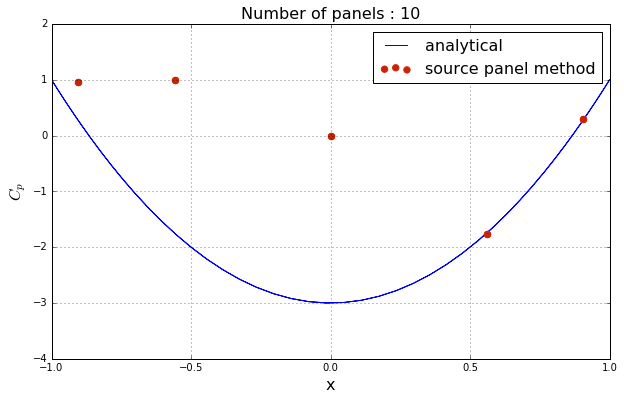

In [15]:
pyplot.figure(figsize=(10, 6))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.plot(x_cylinder, cp_anal, color='b', linestyle='-', linewidth=1, zorder=1)
pyplot.scatter([p.xc for p in panels],[p.cp for p in panels], color='#CD2305', s=40, zorder=2)
pyplot.title('Number of panels : %d' % N_panels, fontsize=16)
pyplot.legend(['analytical', 'source panel method'], loc='best', prop={'size':16})
pyplot.xlim(-1.0, 1.0)
pyplot.ylim(-4.0, 2.0);

# 2

In [51]:
N_panels = 20                    # number of panels desired

T = 0.12
H = 0.00
c = 1
a = c/4
r = (0.25+T/(3*numpy.sqrt(3)))                      # circle radius
zeta_c = -4*a/(3*numpy.sqrt(3))*T + 1j*2*a*H        # circle center
theta = numpy.linspace(0, 2*numpy.pi, N_panels+1)   # theta endpoints of panels
zeta = r*numpy.exp(1j*theta)                       # endpoints of circle surface panels
z_ends = (zeta+zeta_c) + a**2/(zeta+zeta_c)        # endpoints of airfoil surface panels
x_ends,  y_ends = z_ends.real, z_ends.imag

# define the panels
panels = numpy.empty(N_panels, dtype=object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])

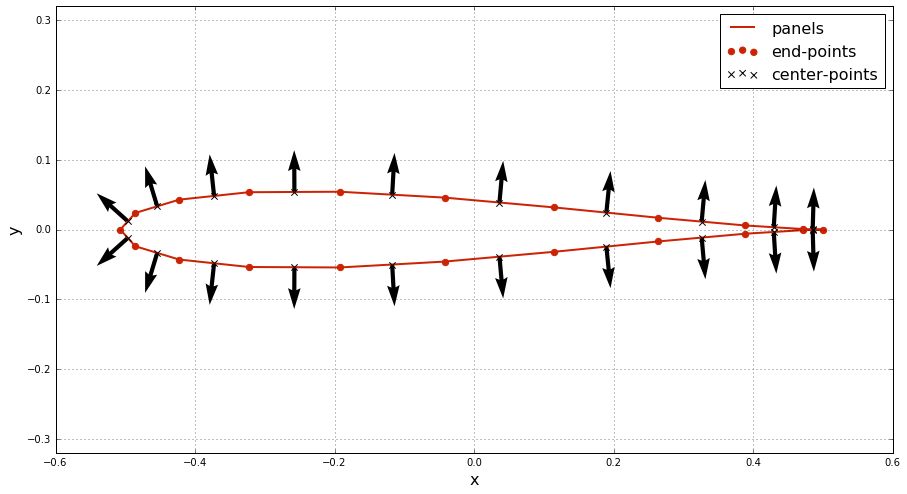

In [65]:
pyplot.figure(figsize=(15, 8))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_ends, y_ends, color='#CD2305', linestyle='-', linewidth=2)
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels], color='#CD2305', s=40)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels], color='k', marker='x', s=40, zorder=3)
pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [p.n[0] for p in panels], [p.n[1] for p in panels],
              scale=20, width=0.005)
pyplot.legend(['panels', 'end-points', 'center-points'], 
           loc='best', prop={'size':16})
pyplot.axis('equal');

In [52]:
A,b = build_matrix(panels)
sigma = numpy.linalg.solve(A,b)
sigma

array([-0.02625414, -0.05951229, -0.09018285, -0.10964029, -0.10969989,
       -0.08092882, -0.01280446,  0.11255996,  0.35533052,  1.07562439,
        1.07562439,  0.35533052,  0.11255996, -0.01280446, -0.08092882,
       -0.10969989, -0.10964029, -0.09018285, -0.05951229, -0.02625414])

In [53]:
for i, panel in enumerate(panels):
    panel.sigma = sigma[i]

In [54]:
AA,bb = build_A(panels)

# computes the tangential velocity at each panel center-point
vt = numpy.dot(AA, sigma) + bb

for i, panel in enumerate(panels):
    panel.vt = vt[i]

In [63]:
for panel in panels:
    panel.cp = 1.0-(panel.vt/u_inf)**2
    
voverVsquared=numpy.array([0, 0.64, 1.01, 1.241, 1.378, 1.402, 1.411, 1.411, 1.399, 1.378, 1.35, 1.288, 1.228, 1.166, 1.109, 1.044, 0.956, 0.906, 0])
print(voverVsquared)
xtheo=numpy.array([0, 0.5, 1.25, 2.5, 5.0, 7.5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 95, 100])
xtheo = (xtheo)/100-0.5
print(xtheo)

[ 0.     0.64   1.01   1.241  1.378  1.402  1.411  1.411  1.399  1.378
  1.35   1.288  1.228  1.166  1.109  1.044  0.956  0.906  0.   ]
[-0.5    -0.495  -0.4875 -0.475  -0.45   -0.425  -0.4    -0.35   -0.3    -0.25
 -0.2    -0.1     0.      0.1     0.2     0.3     0.4     0.45    0.5   ]


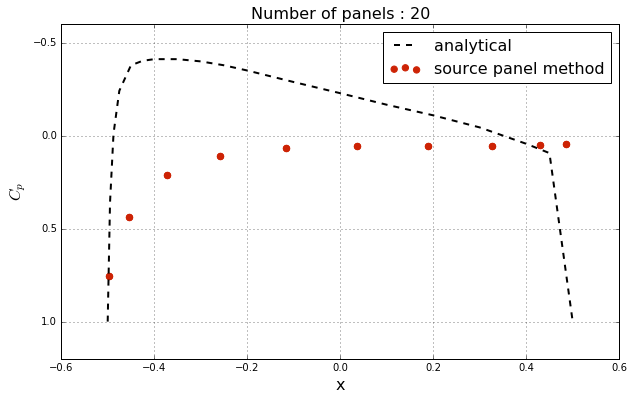

In [64]:
pyplot.figure(figsize=(10, 6))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
#pyplot.plot(x_ends, cp_anal, color='b', linestyle='-', linewidth=1, zorder=1)
pyplot.scatter([p.xc for p in panels],[p.cp for p in panels], color='#CD2305', s=40, zorder=2)
pyplot.plot(xtheo, 1-voverVsquared, color='k', linestyle='--',linewidth=2)
pyplot.title('Number of panels : %d' % N_panels, fontsize=16)
pyplot.legend(['analytical', 'source panel method'], loc='best', prop={'size':16})
pyplot.gca().invert_yaxis()
#pyplot.xlim(-1.0, 1.0)
#pyplot.ylim(-4.0, 2.0);

# 3

In [79]:
for panel in panels:
    flux = panel.sigma/panel.length

In [80]:
flux

-0.90348923944571047

This should all add up to 0.